In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata

#load the data from CBS, this might take a while..
#Taking the DBs from 2015 onwards, since 2014 and prior used a different format..
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [43]:
dh_buurt_data_15 = buurt_data_15[(buurt_data_15["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_15["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_16 = buurt_data_16[(buurt_data_16["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_16["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_18 = buurt_data_18[(buurt_data_18["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_18["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]

In [44]:
amenities_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_81','RUCultuurRecreatieOverigeDiensten_85','AfstandTotHuisartsenpraktijk_94','AfstandTotGroteSupermarkt_95','AfstandTotKinderdagverblijf_96','AfstandTotSchool_97']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_81':'horeca_biz','RUCultuurRecreatieOverigeDiensten_85':'recreation_biz','AfstandTotHuisartsenpraktijk_94':'dist_GP','AfstandTotGroteSupermarkt_95':'dist_super','AfstandTotKinderdagverblijf_96':'dist_nursery','AfstandTotSchool_97':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")
amenities_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").set_index("buurtname")

In [45]:
citizens_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")
citizens_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise").set_index("buurtname")

In [46]:
amenities_dh = pd.concat([amenities_dh_15,amenities_dh_16,amenities_dh_17,amenities_dh_18,amenities_dh_19], keys=[2015,2016,2017,2018,2019])

In [47]:
citizens_dh = pd.concat([citizens_dh_15,citizens_dh_16,citizens_dh_17,citizens_dh_18,citizens_dh_19], keys=[2015,2016,2017,2018,2019])

In [48]:
citizens_dh

total_citizens  total_western  morocco  antilles  \
     buurtname                                                         
2015 Oostduinen                  0              0        0         0   
     Belgisch Park            7955           1840       75        70   
     Westbroekpark             805            210        0        10   
     Duttendel                1050            295        0         5   
     Nassaubuurt              1515            445        5        10   
...                            ...            ...      ...       ...   
2019 De Rivieren                40              0        0         0   
     De Lanen                 5440            545      190       145   
     De Velden                4200            430      135        45   
     De Vissen                8620            885      340       105   
     Rietbuurt                2795            285      190        65   

                    suriname  turkey  other_non_western  
     buurtname                                           
2015 Oostduinen            0       0                  0  
     Belgisch Park       155      35                520  
     Westbroekpark         5       0                 65  
     Duttendel             5       5                 60  
     Nassaubuurt          25       0                145  
...                      ...     ...                ...  
2019 De Rivieren           5       0                  0  
     De Lanen            660     235                665  
     De Velden           455     140                485  
     De Vissen           960     185                790  
     Rietbuurt           325     105                300  

[570 rows x 7 columns]

In [49]:
citizens_dh["total_western"] = citizens_dh["total_western"] / citizens_dh["total_citizens"]
citizens_dh["morocco"] = citizens_dh["morocco"] / citizens_dh["total_citizens"]
citizens_dh["antilles"] = citizens_dh["antilles"] / citizens_dh["total_citizens"]
citizens_dh["suriname"] = citizens_dh["suriname"] / citizens_dh["total_citizens"]
citizens_dh["turkey"] = citizens_dh["turkey"] / citizens_dh["total_citizens"]
citizens_dh["other_non_western"] = citizens_dh["other_non_western"] / citizens_dh["total_citizens"]
citizens_dh = citizens_dh.fillna(0)
citizens_dh

total_citizens  total_western   morocco  antilles  \
     buurtname                                                          
2015 Oostduinen                  0       0.000000  0.000000  0.000000   
     Belgisch Park            7955       0.231301  0.009428  0.008799   
     Westbroekpark             805       0.260870  0.000000  0.012422   
     Duttendel                1050       0.280952  0.000000  0.004762   
     Nassaubuurt              1515       0.293729  0.003300  0.006601   
...                            ...            ...       ...       ...   
2019 De Rivieren                40       0.000000  0.000000  0.000000   
     De Lanen                 5440       0.100184  0.034926  0.026654   
     De Velden                4200       0.102381  0.032143  0.010714   
     De Vissen                8620       0.102668  0.039443  0.012181   
     Rietbuurt                2795       0.101968  0.067979  0.023256   

                    suriname    turkey  other_non_western  
     buurtname                                             
2015 Oostduinen     0.000000  0.000000           0.000000  
     Belgisch Park  0.019485  0.004400           0.065368  
     Westbroekpark  0.006211  0.000000           0.080745  
     Duttendel      0.004762  0.004762           0.057143  
     Nassaubuurt    0.016502  0.000000           0.095710  
...                      ...       ...                ...  
2019 De Rivieren    0.125000  0.000000           0.000000  
     De Lanen       0.121324  0.043199           0.122243  
     De Velden      0.108333  0.033333           0.115476  
     De Vissen      0.111369  0.021462           0.091647  
     Rietbuurt      0.116279  0.037567           0.107335  

[570 rows x 7 columns]

In [50]:
citizens_dh.unstack(level=0)

total_citizens                                  \
                                    2015    2016    2017    2018    2019   
buurtname                                                                  
Archipelbuurt                     5720.0  5835.0  5925.0  6100.0  6160.0   
Arendsdorp                        1310.0  1295.0  1315.0  1305.0  1365.0   
Belgisch Park                     7955.0  8055.0  8145.0  8205.0  8245.0   
Bezuidenhout-Midden               3970.0  4025.0  4050.0  4285.0  4500.0   
Bezuidenhout-Oost                 8940.0  9015.0  9030.0  9010.0  9045.0   
...                                  ...     ...     ...     ...     ...   
Zijden, Steden en Zichten         7665.0  7680.0  7740.0  7850.0  7955.0   
Zonne Veld                        3425.0  3445.0  3415.0  3440.0  3405.0   
Zorgvliet                          415.0   455.0   490.0   500.0   530.0   
Zuiderpark                         160.0   165.0   165.0   160.0   155.0   
Zuidwal                           6505.0  6650.0  6755.0  6885.0  6910.0   

                          total_western                                \
                                   2015      2016      2017      2018   
buurtname                                                               
Archipelbuurt                  0.297203  0.293916  0.291139  0.298361   
Arendsdorp                     0.293893  0.301158  0.300380  0.291188   
Belgisch Park                  0.231301  0.236499  0.240025  0.243144   
Bezuidenhout-Midden            0.268262  0.275776  0.285185  0.287048   
Bezuidenhout-Oost              0.216443  0.221298  0.229790  0.236404   
...                                 ...       ...       ...       ...   
Zijden, Steden en Zichten      0.116765  0.123698  0.129845  0.133758   
Zonne Veld                     0.081752  0.087083  0.083455  0.084302   
Zorgvliet                      0.349398  0.329670  0.316327  0.350000   
Zuiderpark                     0.093750  0.090909  0.090909  0.093750   
Zuidwal                        0.198309  0.198496  0.200592  0.209150   

                                     ...    turkey                      \
                               2019  ...      2015      2016      2017   
buurtname                            ...                                 
Archipelbuurt              0.297890  ...  0.004371  0.004284  0.005063   
Arendsdorp                 0.311355  ...  0.000000  0.000000  0.003802   
Belgisch Park              0.241358  ...  0.004400  0.004345  0.004911   
Bezuidenhout-Midden        0.288889  ...  0.007557  0.009938  0.008642   
Bezuidenhout-Oost          0.247651  ...  0.007271  0.008319  0.008306   
...                             ...  ...       ...       ...       ...   
Zijden, Steden en Zichten  0.132621  ...  0.206784  0.208984  0.213178   
Zonne Veld                 0.086637  ...  0.072993  0.078374  0.080527   
Zorgvliet                  0.330189  ...  0.000000  0.000000  0.000000   
Zuiderpark                 0.064516  ...  0.000000  0.030303  0.030303   
Zuidwal                    0.212735  ...  0.026902  0.024812  0.025167   

                                              other_non_western            \
                               2018      2019              2015      2016   
buurtname                                                                   
Archipelbuurt              0.004098  0.004058          0.078671  0.082262   
Arendsdorp                 0.003831  0.003663          0.125954  0.115830   
Belgisch Park              0.005484  0.006064          0.065368  0.064556   
Bezuidenhout-Midden        0.010502  0.010000          0.133501  0.135404   
Bezuidenhout-Oost          0.008879  0.008845          0.084452  0.093733   
...                             ...       ...               ...       ...   
Zijden, Steden en Zichten  0.212739  0.222502          0.106327  0.110677   
Zonne Veld                 0.084302  0.092511          0.084672  0.085631   
Zorgvliet                  0.000000  0.000000         

In [51]:
amenities_dh.unstack(level=0)

avg_housevalue                              \
                                    2015   2016   2017   2018   2019   
buurtname                                                              
Archipelbuurt                      376.0  388.0  407.0  443.0  506.0   
Arendsdorp                         483.0  498.0  529.0  567.0  647.0   
Belgisch Park                      294.0  298.0  312.0  339.0  370.0   
Bezuidenhout-Midden                244.0  250.0  267.0  277.0  323.0   
Bezuidenhout-Oost                  169.0  172.0  185.0  203.0  244.0   
...                                  ...    ...    ...    ...    ...   
Zijden, Steden en Zichten          106.0  106.0  112.0  118.0  131.0   
Zonne Veld                         230.0  238.0  250.0  268.0  298.0   
Zorgvliet                          519.0  532.0  553.0  612.0  700.0   
Zuiderpark                          95.0   94.0   96.0  101.0  111.0   
Zuidwal                            141.0  143.0  148.0  163.0  185.0   

                          owned_houses                          ...  \
                                  2015  2016  2017  2018  2019  ...   
buurtname                                                       ...   
Archipelbuurt                     49.0  49.0  50.0  50.0  52.0  ...   
Arendsdorp                        39.0  39.0  40.0  39.0  41.0  ...   
Belgisch Park                     58.0  58.0  59.0  59.0  60.0  ...   
Bezuidenhout-Midden               60.0  60.0  59.0  54.0  54.0  ...   
Bezuidenhout-Oost                 59.0  58.0  57.0  55.0  55.0  ...   
...                                ...   ...   ...   ...   ...  ...   
Zijden, Steden en Zichten         26.0  26.0  27.0  27.0  27.0  ...   
Zonne Veld                        65.0  64.0  64.0  64.0  65.0  ...   
Zorgvliet                         46.0  50.0  51.0  52.0  57.0  ...   
Zuiderpark                         0.0   0.0   0.0   0.0   0.0  ...   
Zuidwal                           14.0  14.0  14.0  14.0  14.0  ...   

                          dist_nursery                     dist_school       \
                                  2015 2016 2017 2018 2019        2015 2016   
buurtname                                                                     
Archipelbuurt                      0.4  0.4  0.4  NaN  NaN         0.4  0.5   
Arendsdorp                         0.6  0.6  0.6  NaN  NaN         0.6  0.6   
Belgisch Park                      0.4  0.4  0.4  NaN  NaN         0.5  0.5   
Bezuidenhout-Midden                0.2  0.2  0.2  NaN  NaN         0.4  0.4   
Bezuidenhout-Oost                  0.2  0.2  0.2  NaN  NaN         0.4  0.4   
...                                ...  ...  ...  ...  ...         ...  ...   
Zijden, Steden en Zichten          0.3  0.4  0.3  NaN  NaN         0.3  0.3   
Zonne Veld                         0.4  0.4  0.4  NaN  NaN         0.5  0.5   
Zorgvliet                          0.5  0.6  0.6  NaN  NaN         0.3  0.3   
Zuiderpark                         0.2  0.3  0.3  NaN  NaN         0.5  0.4   
Zuidwal                            0.3  0.3  0.4  NaN  NaN         0.4  0.4   

                                          
                          2017 2018 2019  
buurtname                                 
Archipelbuurt              0.4  NaN  NaN  
Arendsdorp                 0.6  NaN  NaN  
Belgisch Park              0.5  NaN  NaN  
Bezuidenhout-Midden        0.4  NaN  NaN  
Bezuidenhout-Oost          0.4  NaN  NaN  
...                        ...  ...  ...  
Zijden, Steden en Zichten  0.3  NaN  NaN  
Zonne Veld                 0.5  NaN  NaN  
Zorgvliet                  0.3  NaN  NaN  
Zuiderpark                 0.5  NaN  NaN  
Zuidwal                    0.4  NaN  NaN  

[117 rows x 45 columns]

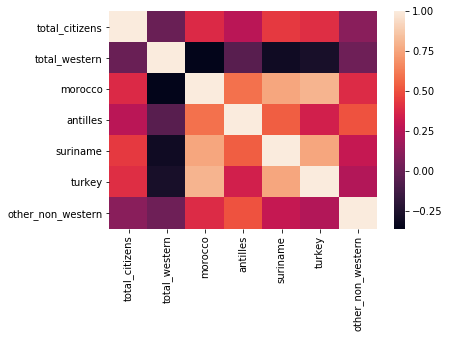

In [52]:
sns.heatmap(citizens_dh.corr())

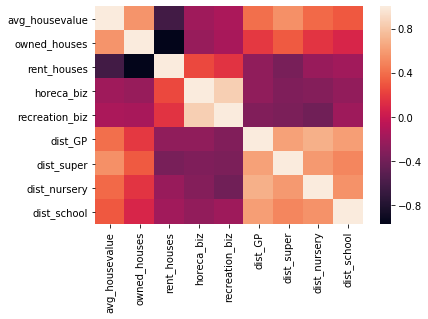

In [53]:
sns.heatmap(amenities_dh.corr())

In [124]:
citizens_dh.unstack(1)["total_citizens"].columns

Index(['Archipelbuurt', 'Arendsdorp', 'Belgisch Park', 'Bezuidenhout-Midden',
       'Bezuidenhout-Oost', 'Bezuidenhout-West', 'Binckhorst',
       'Bloemenbuurt-Oost', 'Bloemenbuurt-West', 'Bohemen en Meer en Bos',
       ...
       'Waterbuurt', 'Westbroekpark', 'Westvliet', 'Willemspark',
       'Zeeheldenkwartier', 'Zijden, Steden en Zichten', 'Zonne Veld',
       'Zorgvliet', 'Zuiderpark', 'Zuidwal'],
      dtype='object', name='buurtname', length=117)

In [136]:
diff_citizens = pd.DataFrame(columns=citizens_dh.unstack(1)["total_citizens"].columns)
diff_citizens = diff_citizens.append(pd.Series(name='2016-2015'))
diff_citizens = diff_citizens.append(pd.Series(name='2017-2016'))
diff_citizens = diff_citizens.append(pd.Series(name='2018-2017'))
diff_citizens = diff_citizens.append(pd.Series(name='2019-2018'))

for r in citizens_dh.unstack(0)["total_western"].iterrows():
    diff_citizens[r[0]][0] = r[1][2016] - r[1][2015]
    diff_citizens[r[0]][1] = r[1][2017] - r[1][2016]
    diff_citizens[r[0]][2] = r[1][2018] - r[1][2017]
    diff_citizens[r[0]][3] = r[1][2019] - r[1][2018]

In [137]:
diff_amenities = pd.DataFrame(columns=citizens_dh.unstack(1)["total_citizens"].columns)
diff_amenities = diff_amenities.append(pd.Series(name='2016-2015'))
diff_amenities = diff_amenities.append(pd.Series(name='2017-2016'))
diff_amenities = diff_amenities.append(pd.Series(name='2018-2017'))
diff_amenities = diff_amenities.append(pd.Series(name='2019-2018'))

for r in amenities_dh.unstack(0)["avg_housevalue"].iterrows():
    diff_amenities[r[0]][0] = r[1][2016] - r[1][2015]
    diff_amenities[r[0]][1] = r[1][2017] - r[1][2016]
    diff_amenities[r[0]][2] = r[1][2018] - r[1][2017]
    diff_amenities[r[0]][3] = r[1][2019] - r[1][2018]

In [140]:
diff_citizens

buurtname,Archipelbuurt,Arendsdorp,Belgisch Park,Bezuidenhout-Midden,Bezuidenhout-Oost,Bezuidenhout-West,Binckhorst,Bloemenbuurt-Oost,Bloemenbuurt-West,Bohemen en Meer en Bos,...,Waterbuurt,Westbroekpark,Westvliet,Willemspark,Zeeheldenkwartier,"Zijden, Steden en Zichten",Zonne Veld,Zorgvliet,Zuiderpark,Zuidwal
2016-2015,-0.00328677,0.00726517,0.005198,0.00751443,0.00485488,0.00562711,-0.0477307,0.000812987,0.00146031,0.00969558,...,0.00337648,-0.00320085,NaN,0.00143092,0.00812516,0.0069334,0.0053309,-0.0197273,-0.00284091,0.000187248
2017-2016,-0.00277678,-0.000778073,0.00352549,0.00940879,0.00849175,0.00425321,0.0215137,0.00593385,-0.00322107,-0.0057833,...,-0.00458791,0.00268632,NaN,0.00149425,0.00348609,0.00614704,-0.00362738,-0.0133438,0,0.00209591
2018-2017,0.00722142,-0.00919249,0.00311987,0.00186266,0.00661441,0.013472,0.0104965,0.00401419,0.00502874,0.0093643,...,0.000670949,0.00100861,NaN,0.00910515,0.00440753,0.003913,0.000846982,0.0336735,0.00284091,0.00855817
2019-2018,-0.000471045,0.0201676,-0.00178603,0.00184105,0.0112466,-0.0103762,0.00493585,0.00350115,0.00469993,0.000385466,...,0.00224227,0.00745357,NaN,0.0115867,0.00661052,-0.00113697,0.00233497,-0.0198113,-0.0292339,0.00358484


In [56]:
corr_df = pd.DataFrame()

In [57]:
for c in citizens_dh.columns:
    for a in amenities_dh.columns:
        print(c + " correlation with " + a)
        temp = pd.DataFrame(citizens_dh.unstack(1)[c].corrwith(amenities_dh.unstack(level=1)[a])).rename({0 : c+a}, axis =1)
        corr_df = pd.concat([corr_df, temp],axis=1)

total_citizens correlation with avg_housevalue
total_citizens correlation with owned_houses
total_citizens correlation with rent_houses
total_citizens correlation with horeca_biz
total_citizens correlation with recreation_biz
total_citizens correlation with dist_GP
total_citizens correlation with dist_super
total_citizens correlation with dist_nursery
total_citizens correlation with dist_school
total_western correlation with avg_housevalue
total_western correlation with owned_houses
total_western correlation with rent_houses
total_western correlation with horeca_biz
total_western correlation with recreation_biz
total_western correlation with dist_GP
total_western correlation with dist_super
total_western correlation with dist_nursery
total_western correlation with dist_school
morocco correlation with avg_housevalue
morocco correlation with owned_houses
morocco correlation with rent_houses
morocco correlation with horeca_biz
morocco correlation with recreation_biz
morocco correlation wi

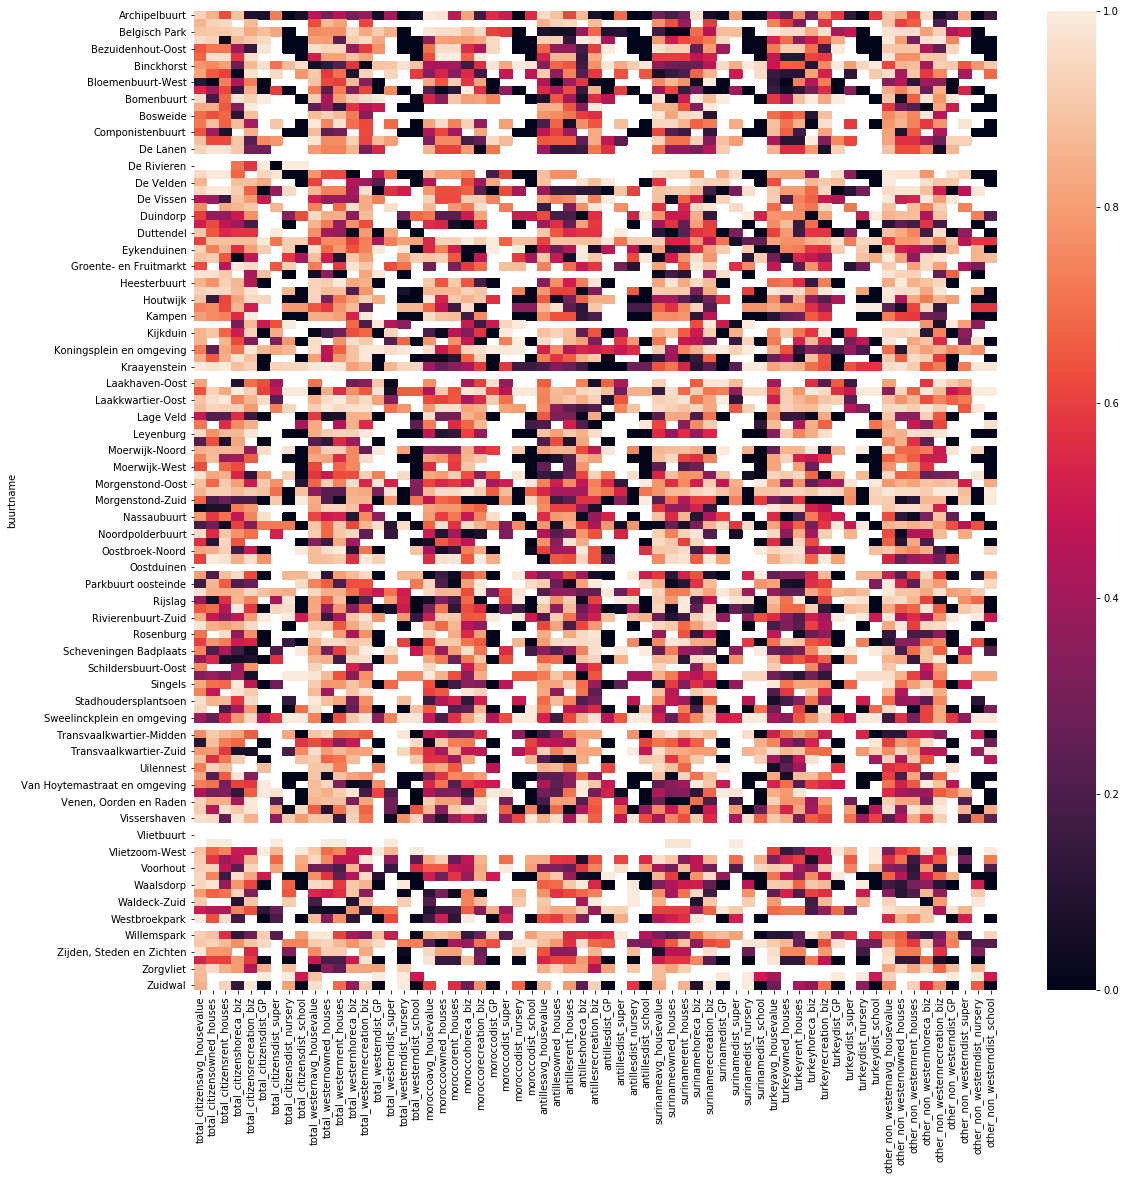

In [58]:
fig, ax = plt.subplots(figsize = (18, 18))

sns.heatmap(abs(corr_df), ax = ax)

buurtname
Archipelbuurt                AxesSubplot(0.125,0.125;0.775x0.755)
Arendsdorp                   AxesSubplot(0.125,0.125;0.775x0.755)
Belgisch Park                AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Midden          AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Oost            AxesSubplot(0.125,0.125;0.775x0.755)
                                             ...                 
Zijden, Steden en Zichten    AxesSubplot(0.125,0.125;0.775x0.755)
Zonne Veld                   AxesSubplot(0.125,0.125;0.775x0.755)
Zorgvliet                    AxesSubplot(0.125,0.125;0.775x0.755)
Zuiderpark                   AxesSubplot(0.125,0.125;0.775x0.755)
Zuidwal                      AxesSubplot(0.125,0.125;0.775x0.755)
Name: other_non_western, Length: 117, dtype: object

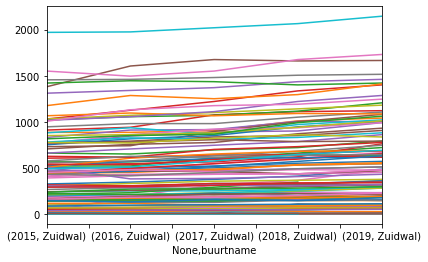

In [17]:
citizens_dh.groupby("buurtname")["other_non_western"].plot()